# House Prices - Advanced Regression Techniques

Peça a um comprador de imóvel residencial para descrever a casa dos seus sonhos, e provavelmente não começará com a altura do teto do porão ou a proximidade de uma ferrovia leste-oeste. Mas o conjunto de dados dessa competição de playground prova que influencia muito mais as negociações de preços do que o número de quartos ou uma cerca branca.
Com 79 variáveis ​​explicativas que descrevem (quase) todos os aspectos das casas residenciais em Ames, Iowa, esta competição desafia você a prever o preço final de cada casa.

Neste desafio de kaggle sua função é prever o preço de venda de cada casa. Para cada Id no conjunto de teste, você deve prever o valor da variável SalePrice. 

https://www.kaggle.com/c/house-prices-advanced-regression-techniques/overview 


## Objetivos de aprendizado:
Depois de fazer este Colab, você saberá como:
* Trabalhar com modelos de regressão linear
* Implementar o método de gradiente descendente
* Implementar uma equação fechada empregando a Equação Normal


## Datasets

Baixe os dados da competição deste site: [Kaggle: House Prices - Advanced Regression Techniques](https://www.kaggle.com/c/house-prices-advanced-regression-techniques/data)

## Chame as declarações de importação
O seguinte codigo importa os modulos necessários

In [ ]:
#@title Load the imports

# This Python 3 environment comes with many helpful analytics libraries installed

import os
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

import seaborn as sns  # visualization tool
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

import missingno as msno
sns.set()

[width, height] = matplotlib.rcParams['figure.figsize']
if width < 10:
    matplotlib.rcParams['figure.figsize'] = [width * 2.5, height]

## Analisis e exploração dos dados
*Lembrar: Precisa carregar o house-prices-advanced-regression-techniques.zip na raiz do projeto*

In [ ]:
!unzip -n house-prices-advanced-regression-techniques.zip -d house

for dirname, _, filenames in os.walk('./house'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

Archive:  house-prices-advanced-regression-techniques.zip
  inflating: house/data_description.txt  
  inflating: house/sample_submission.csv  
  inflating: house/test.csv          
  inflating: house/train.csv         
./house/train.csv
./house/data_description.txt
./house/test.csv
./house/sample_submission.csv


In [ ]:
# Passo 1
# Carrega os dados do dataset house-prices-advanced-regression empregando pandas (pd)
# link: https://pandas.pydata.org/docs/reference/api/pandas.read_csv.html
### COMENZAR O CODIGO AQUI ### 
train_data = pd.read_csv('./house/train.csv') # ???
### TERMINA AQUI ###

train_data.head(15)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,...,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,...,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,...,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,...,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,...,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,...,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
5,6,50,RL,85.0,14115,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Mitchel,Norm,Norm,1Fam,1.5Fin,5,5,1993,1995,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,Wood,Gd,TA,No,GLQ,732,Unf,0,64,796,GasA,...,Y,SBrkr,796,566,0,1362,1,0,1,1,1,1,TA,5,Typ,0,NaN,Attchd,1993.0,Unf,2,480,TA,TA,Y,40,30,0,320,0,0,NaN,MnPrv,Shed,700,10,2009,WD,Normal,143000
6,7,20,RL,75.0,10084,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Somerst,Norm,Norm,1Fam,1Story,8,5,2004,2005,Gable,CompShg,VinylSd,VinylSd,Stone,186.0,Gd,TA,PConc,Ex,TA,Av,GLQ,1369,Unf,0,317,1686,GasA,...,Y,SBrkr,1694,0,0,1694,1,0,2,0,3,1,Gd,7,Typ,1,Gd,Attchd,2004.0,RFn,2,636,TA,TA,Y,255,57,0,0,0,0,NaN,NaN,NaN,0,8,2007,WD,Normal,307000
7,8,60,RL,NaN,10382,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,NWAmes,PosN,Norm,1Fam,2Story,7,6,1973,1973,Gable,CompShg,HdBoard,HdBoard,Stone,240.0,TA,TA,CBlock,Gd,TA,Mn,ALQ,859,BLQ,32,216,1107,GasA,...,Y,SBrkr,1107,983,0,2090,1,0,2,1,3,1,TA,7,Typ,2,TA,Attchd,1973.0,RFn,2,484,TA,TA,Y,235,204,228,0,0,0,NaN,NaN,Shed,350,11,2009,WD,Normal,200000
8,9,50,RM,51.0,6120,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,OldTown,Artery,Norm,1Fam,1.5Fin,7,5,1931,1950,Gable,CompShg,BrkFace,Wd Shng,None,0.0,TA,TA,BrkTil,TA,TA,No,Unf,0,Unf,0,952,952,GasA,...,Y,FuseF,1022,752,0,1774,0,0,2,0,2,2,TA,8,Min1,2,TA,Detchd,1931.0,Unf,2,468,Fa,TA,Y,90,0,205,0,0,0,NaN,NaN,NaN,0,4,2008,WD,Abnorml,129900
9,10,190,RL,50.0,7420,Pave,NaN,Reg,Lvl,AllPub,Corner,Gtl,BrkSide,Artery,Artery,2fmCon,1.5Unf,5,6,1939,1950,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,BrkTil,TA,TA,No,GLQ,851,Unf,0,140,991,

In [ ]:
# Explorando os dados de teste 
# Lembrando que os dados de teste de kaggle não possuem o atributo SalePrice (label para o problema de regressão)
test_data = pd.read_csv("./house/test.csv")
test_data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Feedr,Norm,1Fam,1Story,5,6,1961,1961,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,CBlock,TA,TA,No,Rec,468.0,LwQ,144.0,270.0,882.0,GasA,TA,Y,SBrkr,896,0,0,896,0.0,0.0,1,0,2,1,TA,5,Typ,0,NaN,Attchd,1961.0,Unf,1.0,730.0,TA,TA,Y,140,0,0,0,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,NAmes,Norm,Norm,1Fam,1Story,6,6,1958,1958,Hip,CompShg,Wd Sdng,Wd Sdng,BrkFace,108.0,TA,TA,CBlock,TA,TA,No,ALQ,923.0,Unf,0.0,406.0,1329.0,GasA,TA,Y,SBrkr,1329,0,0,1329,0.0,0.0,1,1,3,1,Gd,6,Typ,0,NaN,Attchd,1958.0,Unf,1.0,312.0,TA,TA,Y,393,36,0,0,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,5,5,1997,1998,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,PConc,Gd,TA,No,GLQ,791.0,Unf,0.0,137.0,928.0,GasA,Gd,Y,SBrkr,928,701,0,1629,0.0,0.0,2,1,3,1,TA,6,Typ,1,TA,Attchd,1997.0,Fin,2.0,482.0,TA,TA,Y,212,34,0,0,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,6,6,1998,1998,Gable,CompShg,VinylSd,VinylSd,BrkFace,20.0,TA,TA,PConc,TA,TA,No,GLQ,602.0,Unf,0.0,324.0,926.0,GasA,Ex,Y,SBrkr,926,678,0,1604,0.0,0.0,2,1,3,1,Gd,7,Typ,1,Gd,Attchd,1998.0,Fin,2.0,470.0,TA,TA,Y,360,36,0,0,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,Inside,Gtl,StoneBr,Norm,Norm,TwnhsE,1Story,8,5,1992,1992,Gable,CompShg,HdBoard,HdBoard,None,0.0,Gd,TA,PConc,Gd,TA,No,ALQ,263.0,Unf,0.0,1017.0,1280.0,GasA,Ex,Y,SBrkr,1280,0,0,1280,0.0,0.0,2,0,2,1,Gd,5,Typ,0,NaN,Attchd,1992.0,RFn,2.0,506.0,TA,TA,Y,0,82,0,0,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


In [ ]:
# Explorano os dados de submisão para kaggle
submission = pd.read_csv('./house/sample_submission.csv')
submission.head()

,Id,SalePrice
0,1461,169277.052498
1,1462,187758.393989
2,1463,183583.683570
3,1464,179317.477511
4,1465,150730.079977


## Descripção das caracteristicas
---

In [ ]:
train_data.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

* **SalePrice** - o preço de venda da propriedade em dólares. Esta é a variável de destino que você está tentando prever.
* **MSSubClass** : a classe de construção
* **MSZoning** : A classificação geral de zoneamento
* **LotFrontage** : metros lineares da rua conectada à propriedade
* **LotArea** : tamanho do lote em pés quadrados
* **Street** : Tipo de acesso rodoviário
* **Alley** : Tipo de acesso ao beco
* **LotShape** : forma geral da propriedade
* **LandContour** : Nivelamento da propriedade
* **Utilities** : tipos de utilitários disponíveis
* **LotConfig** : configuração do lote
* **LandSlope** : declive da propriedade
* **Neighborhood** : localizações físicas dentro dos limites da cidade de Ames
* **Condition1** : Proximidade com a estrada principal ou ferrovia
* **Condition2** : Proximidade com a estrada principal ou ferrovia (se houver uma segunda)
* **BldgType** : Tipo de habitação
* ...

https://www.kaggle.com/c/house-prices-advanced-regression-techniques/data 

In [ ]:
# Imprime informação das features presentes no conjunto de trenamento
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

### Dados faltantes (missing value)

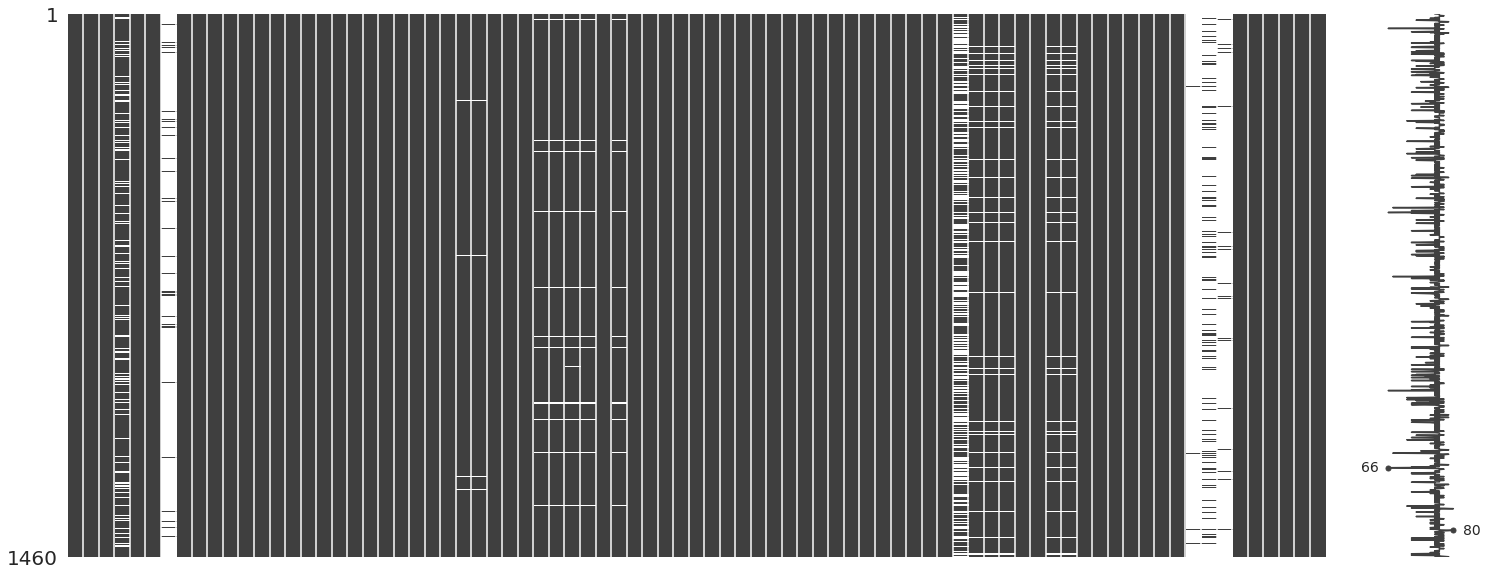

In [ ]:
# Visualize os dados faltantes no conjunto de trenamento
msno.matrix(train_data)
plt.show()

### Análise da correlação entre as features

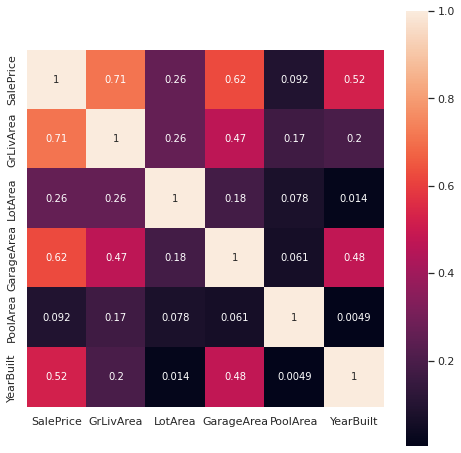

In [ ]:
# Passo 2
# Seleção as feature {'SalePrice', 'GrLivArea', 'LotArea', 'GarageArea', 
# 'PoolArea', 'YearBuilt'} e visualize a matriz de correlação
# link: https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.corr.html?highlight=corr#pandas.DataFrame.corr

### COMENZAR O CODIGO AQUI ### 
fearutes = ['SalePrice', 'GrLivArea', 'LotArea', 'GarageArea', 'PoolArea', 'YearBuilt'] # ???
corrmat = train_data[fearutes].corr() # ???
### TERMINA AQUI ###

plt.figure(figsize=(8,8))
sns.heatmap(corrmat, square=True, annot=True)
plt.show()

### Análise da relação entre SalePrice e GrLivArea e seu comportamento com respeito ou tempo de construção (YearBuilt)

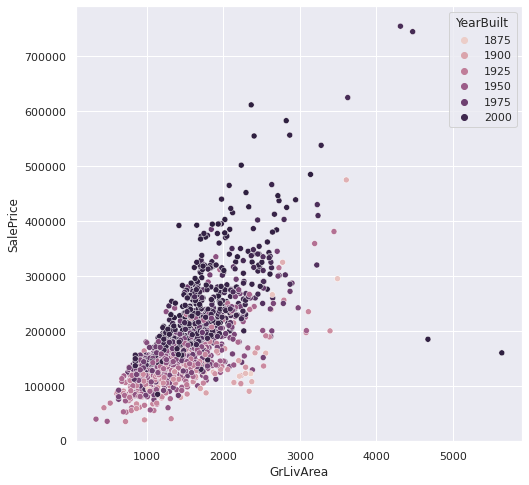

In [ ]:
plt.figure(figsize=(8,8))
sns.scatterplot(data=train_data[fearutes], x="GrLivArea", y="SalePrice", hue="YearBuilt")
plt.show()

## Regressão linear

Neste ponto vamos fazer a implementação de nosso primeiro regresso linear baseado na equação normal. Pare isso empregaremos a seguinte formulação matemática: 

Função de custo:

$$J(\theta) = ||y-X\theta||^2$$

Problema de optimização:

$$\min_{\theta} J(\theta) $$

Solução:

$$\theta = (X^TX)^{-1}X^Ty$$

Predição empregando o modelo obtido $\theta$:

$$ \hat{y} = h_{\theta}(x) = \theta_0 + \theta_1x $$

In [ ]:

class NormalEquationRegression():
  def __init__(self):
    self.theta = [0, 0]
  def fit(self, x, y):
    # Add 1 na frente x = [1 x]
    x = np.hstack((np.ones((x.shape[0],1)), x))
    # Passo 3
    # Implemente a estimação do parâmetro \theta baseado na solução da Ecuação 
    # Normal
    # \theta = (X^TX)^{-1}X^Ty
    ### COMENZAR O CODIGO AQUI ### 
    self.theta = (np.linalg.pinv(x.T@x)@x.T)@y # ???
    ### TERMINA AQUI ###

  def predict(self, x):
    # Passo 4
    # Faça a predição empregando o modelo obtido \theta
    ### COMENZAR O CODIGO AQUI ###
    y_hat = self.theta[0] + self.theta[1]*x # ???
    ### TERMINA AQUI ###
    return y_hat


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

# Seleção da feature a ser estimada
# Lembrem-se que queremos predecir o valor das casas
y = train_data["SalePrice"]

# Selecção das features
# Neste caso estamos trabalhando com uma única variável. Recomendamos empregar a 
# feature GrLivArea para fazer a sua predição. 
features = ["GrLivArea"]
X = pd.get_dummies(train_data[features])
X_test = pd.get_dummies(test_data[features])

# Divisão do conjunto em treinamento e validação
# Seleccione o procentagem para o conjunto de validação
tamanho_val = 0.3
X_train, X_val, y_train, y_val = train_test_split(X,y, test_size=tamanho_val, shuffle=True, random_state=0)

# Criação dos modelos de regressão linear
# Passo 5
# Cree uma instância da classe NormalEquationRegression
### COMENZAR O CODIGO AQUI ###
model = NormalEquationRegression() # ???
### TERMINA AQUI ###

# Treinamento do modelo de regressão linear
# Passo 6
# Empregando a função fit treine o modelo regressão linear
### COMENZAR O CODIGO AQUI ###
model.fit(X_train, y_train) # ???
### TERMINA AQUI ###

# Imprimir os valores do modelo \theta
print("Theta: ", model.theta)

# Predição no conjunto de validação
preditions_val = model.predict(X_val)

# Avaliação dos resultados
# The mean squared error
print("RMSE: {0}".format(mean_squared_error(y_val, preditions_val, squared=False)))
# Explained variance score: 1 is perfect prediction
print('Variance score: %.2f' % r2_score(y_val, preditions_val))

Theta:  [13998.44116376   109.44329072]
RMSE: 61061.10211869844
Variance score: 0.45


In [ ]:
print('y = {0} + {1} X'.format(model.theta[0], model.theta[1]))

y = 13998.44116375742 + 109.4432907227909 X


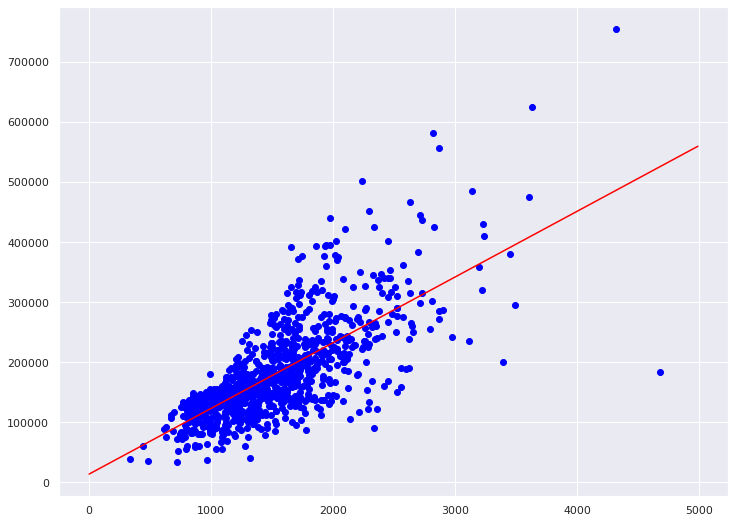

In [ ]:
# Visualização dos resultados obtidos
x_axis = np.arange(0, 5000, 10)
f_x = model.theta[0] + model.theta[1] * x_axis

plt.figure(figsize=(12, 9))
plt.scatter(X_train, y_train,  color='blue')
plt.plot(x_axis, f_x,  color='red')
plt.show()

Agora vamos fazer uma implementação de um regresso linear baseado no descenso do gradiente. Pare isso empregaremos a seguinte formulação matemática:

Função de custo:

$$J(\theta) = \frac{1}{2m} \sum_{i=1}^m ( h_{\theta}(x^i) - y^i )^2 $$

Problema de optimização:

$$\min_{\theta} J(\theta) $$

Solução:

$$\theta^{t} = \theta^{t-1} - \alpha  \frac{\partial}{\partial \theta} J  $$
onde
$$ \frac{\partial}{\partial \theta} J =  \frac{1}{m} \sum_{i=1}^m ( h_{\theta}(x^i) - y^i )x^i$$

Predição empregando o modelo obtido $\theta$:

$$ \hat{y} = h_{\theta}(x) = \theta_0 + \theta_1x $$

In [ ]:
class GDRegression():
  def __init__(self):
    self.theta = [0, 0]
    self.num_iter = 10000
    self.alpha = 0.001
    self.J = []

  def fit(self, x, y):

    x = np.hstack( (np.ones((x.shape[0],1)), x) )
    y = y.to_numpy()[:,np.newaxis]
    m = len(y)
    self.theta = np.zeros((2,1))

    J = (1/(2*m))*np.sum( (x@self.theta-y)**2 )
    print(J)

    J_hist = []
    theta = self.theta
    for i in range(self.num_iter):
      
      h = x@theta

      # Passo 7:
      # Seleções qual das seguintes opções são correta e complete o código
      # a) theta = theta - (self.alpha*(1/m)*np.sum((np.tile(h-y,(1,2)))*x, axis=0)[:, np.newaxis])
      # b) theta[0] = theta[0] - self.alpha*(1/m)*sum((h-y)*x[:,0][:,np.newaxis])
      #    theta[1] = theta[1] - self.alpha*(1/m)*sum((h-y)*x[:,1][:,np.newaxis])
      #
      ### COMENZAR O CODIGO AQUI ###
      # theta[0] = theta[0] - self.alpha*(1/m)*sum((h-y)*x[:,0][:,np.newaxis])
      # theta[1] = theta[1] - self.alpha*(1/m)*sum((h-y)*x[:,1][:,np.newaxis])# ??? 

      theta = theta - (self.alpha*(1/m)*np.sum((np.tile(h-y,(1,2)))*x, axis=0)[:, np.newaxis])
      
           
      ### TERMINA AQUI ###
 
      J = (1/(2*m))*np.sum( (x@theta-y)**2 )
      
      if i % 1000 == 0: 
        print(J)

      J_hist.append(J)

    self.theta = theta
    self.J = J_hist

  def predict(self, x):
    # Passo 8
    # Faça a predição empregando o modelo obtido \theta
    ### COMENZAR O CODIGO AQUI ###
    y_hat = self.theta[0] + self.theta[1]*x # ???
    ### TERMINA AQUI ###
    return y_hat

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

# Seleção da feature a ser estimada
# Lembrem-se que queremos predecir o valor das casas
y = train_data["SalePrice"]

# Selecção das features
# Neste caso estamos trabalhando com uma única variável. Recomendamos empregar a 
# feature GrLivArea para fazer a sua predição. 
features = ["GrLivArea"]
X = pd.get_dummies(train_data[features])
X_test = pd.get_dummies(test_data[features])

# Escale os valores da feature selecionada 
X = (X - X.mean(axis=0)) / X.std(axis=0)

# Divisão do conjunto em treinamento e validação
# Seleccione o procentagem para o conjunto de validação
tamanho_val = 0.3
X_train, X_val, y_train, y_val = train_test_split(X,y, test_size=tamanho_val, shuffle=True, random_state=0)

# Criação dos modelos de regressão linear
model = GDRegression()

# Treinamento do modelo de regressão linear
model.fit(X_train, y_train)

# Imprimir os valores do modelo \theta
print("Theta: ", model.theta)

# Predição no conjunto de validação
preditions_val = model.predict(X_val)

# Avaliação dos resultados
# The mean squared error
print("RMSE: {0}".format(mean_squared_error(y_val, preditions_val, squared=False)))
# Explained variance score: 1 is perfect prediction
print('Variance score: %.2f' % r2_score(y_val, preditions_val))

19355571150.096867
19319604234.71505
3840021178.187161
1766404471.5546112
1488623220.438874
1451411219.628015
1446426173.0839097
1445758349.1000428
1445668882.2926366
1445656896.4221845
1445655290.643995
Theta:  [[179847.96364549]
 [ 57507.98351642]]
RMSE: 61061.40324564777
Variance score: 0.45


In [ ]:
print('y = {0} + {1} X'.format(model.theta[0], model.theta[1]))

y = [179847.96364549] + [57507.98351642] X


[]

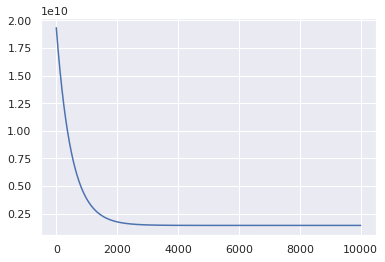

In [ ]:
# Visualização da função de custo
plt.plot(model.J)
plt.plot()

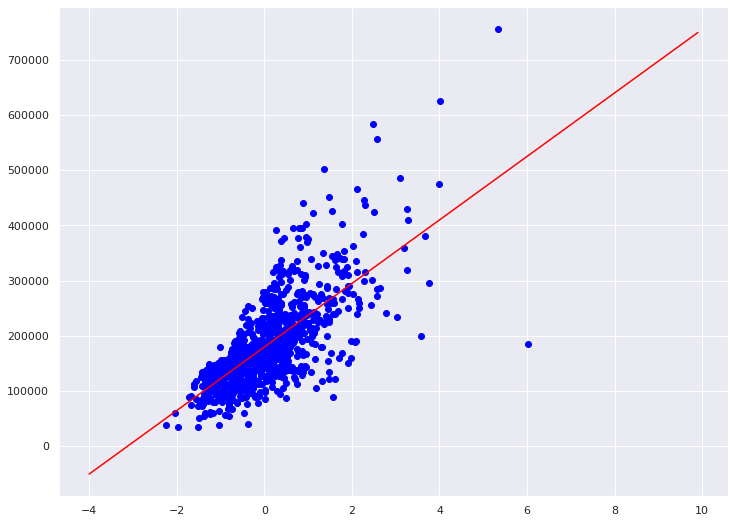

In [ ]:
# Visualização dos resultados obtidos
x_axis = np.arange(-4.0, 10, 0.10)
f_x = model.theta[0] + model.theta[1] * x_axis

x = X_train.to_numpy()

plt.figure(figsize=(12, 9))
plt.scatter(x, y_train,  color='blue')
plt.plot(x_axis, f_x,  color='red')
plt.show()

## Agora vamos empregar os métodos de regressão linear da sklearn

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.linear_model import LinearRegression

# Seleção da feature a ser estimada
# Lembrem-se que queremos predecir o valor das casas
y = train_data["SalePrice"]

# Selecção das features
# Neste caso estamos trabalhando com uma única variável. Recomendamos empregar a 
# feature GrLivArea para fazer a sua predição.
features = ["GrLivArea"]
X = pd.get_dummies(train_data[features])
X_test = pd.get_dummies(test_data[features])

# Divisão do conjunto em treinamento e validação
# Seleccione o procentagem para o conjunto de validação
tamanho_val = 0.3
X_train, X_val, y_train, y_val = train_test_split(X,y, test_size=0.30, shuffle=True, random_state=0)

# Criação dos modelos de regressão linear
# Passo 9
# Cree uma instância da classe LinearRegression
### COMENZAR O CODIGO AQUI ###
model = # ???
### TERMINA AQUI ###

# Treinamento do modelo de regressão linear
# Passo 10
# Empregando a função fit treine o modelo regressão linear
### COMENZAR O CODIGO AQUI ###
model. # ???
### TERMINA AQUI ###

# Predição no conjunto de validação
preditions_val = model.predict(X_val)

# Avaliação dos resultados
# The mean squared error
print("RMSE: {0}".format(mean_squared_error(y_val, preditions_val, squared=False)))
# Explained variance score: 1 is perfect prediction
print('Variance score: %.2f' % r2_score(y_val, preditions_val))


RMSE: 61061.102118698866
Variance score: 0.45


In [ ]:
print('y = {0} + {1} X'.format(model.intercept_, model.coef_[0]))

y = 13998.441163741954 + 109.44329072279999 X


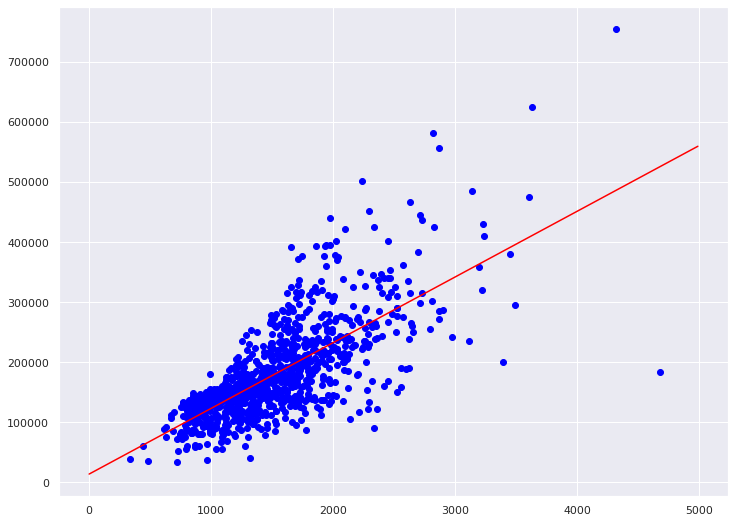

In [ ]:
# Visualização dos resultados obtidos
x_axis = np.arange(0, 5000, 10)
f_x = model.intercept_ + model.coef_[0] * x_axis

plt.figure(figsize=(12, 9))
plt.scatter(X_train, y_train,  color='blue')
plt.plot(x_axis, f_x,  color='red')
plt.show()